In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, fit_report
from IPython.display import HTML
from lmfit.printfuncs import fitreport_html_table

In [2]:
pdata = pd.read_csv(r'C:\voja\proj\turci_comsol\rezultati_danka_novo\rez_ef_05.csv', index_col='freq').applymap(lambda s: complex(s.replace('i', 'j')))

<AxesSubplot:xlabel='freq'>

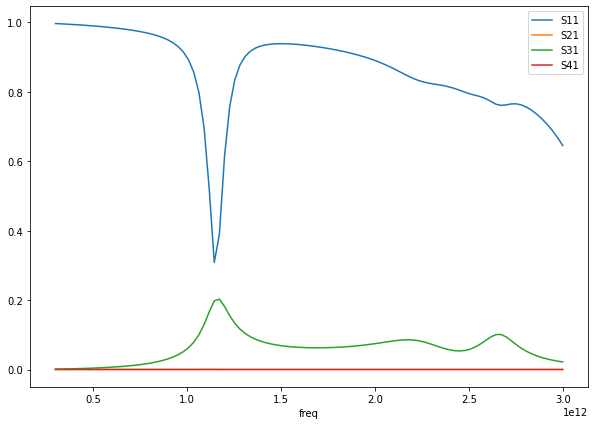

In [3]:
pdata.abs().plot(figsize=(10,7))

In [4]:
freq = pdata.index.values/1e12
s11 = pdata.S11.values

In [5]:
def f1mod(freq, f0, gamma_i, gamma_r, fi):
    br = np.ones_like(freq)*np.exp(1j*fi)*gamma_r
    im = np.ones_like(freq)*(1j*(freq - f0) + gamma_i + gamma_r)
    return br/im

params = Parameters()

params.add('a0', value=0.85)
params.add('fi0', value=1)
params.add('k_f', value=2)

params.add('fr1', value=1.25)
params.add('g_i1', value=0.01)
params.add('g_r1', value=0.01)
params.add('fi1', value=1.1)

params.add('fr2', value=2.45)
params.add('g_i2', value=0.001, min=0)
params.add('g_r2', value=0.01, min=0)
params.add('fi2', value=0.0)

params.add('fr3', value=2.75)
params.add('g_i3', value=0.001, min=0)
params.add('g_r3', value=0.01, min=0)
params.add('fi3', value=0.0)

def s21_model(params, freq):
    faza = params['fi0'] - freq*params['k_f']
    return np.exp(1j*faza)*(params['a0']
     + f1mod(freq, params['fr1'], params['g_i1'], params['g_r1'], params['fi1'])
     + f1mod(freq, params['fr2'], params['g_i2'], params['g_r2'], params['fi2'])
     + f1mod(freq, params['fr3'], params['g_i3'], params['g_r3'], params['fi3']))

def residual(params, freq, s21_data):
    dif = s21_data - s21_model(params, freq)
    return dif.view(float)

out = minimize(residual, params, args=(freq, s11))

In [6]:
HTML(fitreport_html_table(out, show_correl=False))

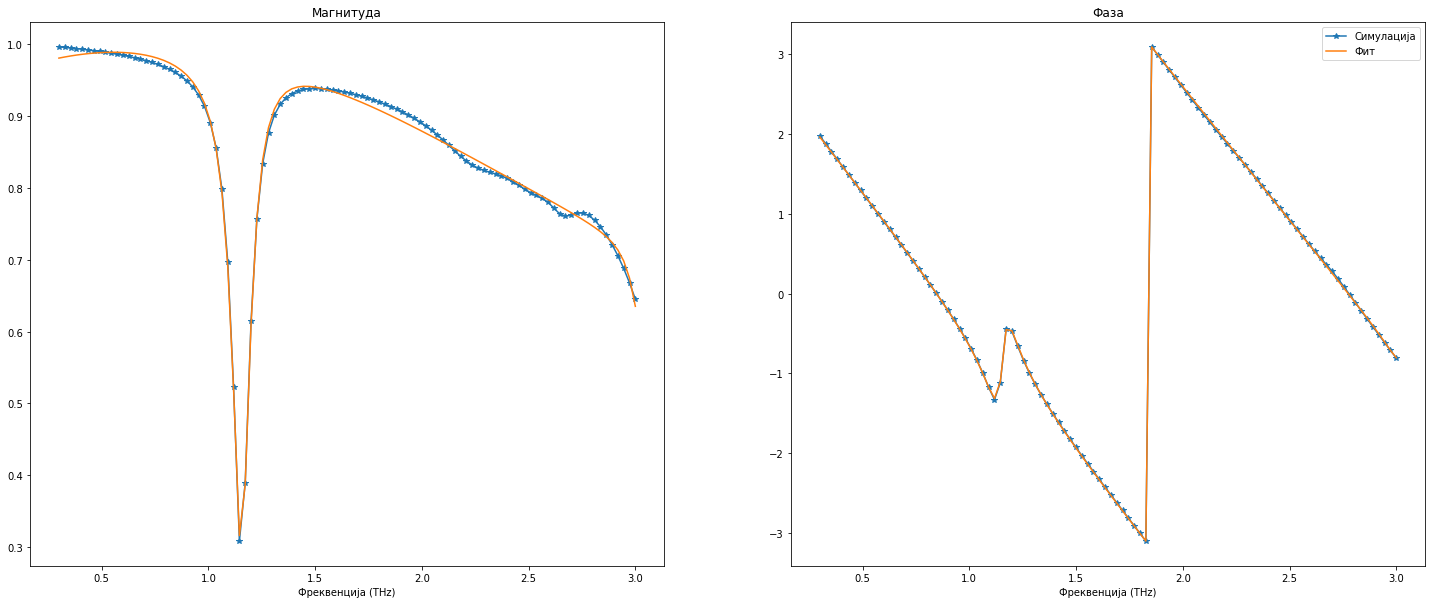

In [7]:
plt.figure(figsize=(25,10))
plt.subplot(121)
plt.title("Магнитуда")
plt.xlabel("Фреквенција (THz)")
plt.plot(freq, abs(s11), '*-', label="Симулација")
# plt.plot(freq, abs(background(freq, 0.85, 1, 20)))
# plt.plot(freq, abs(s21_model(params, freq)))
plt.plot(freq, abs(s21_model(out.params, freq)), label="Фит")
# plt.legend()
plt.subplot(122)
plt.title("Фаза")
plt.xlabel("Фреквенција (THz)")
plt.plot(freq, np.angle(s11), '*-', label="Симулација")
# plt.plot(freq, np.angle(background(freq, 0.85, 1, 20)))
# plt.plot(freq, np.angle(s21_model(params, freq)))
plt.plot(freq, np.angle(s21_model(out.params, freq)), label="Фит")
plt.legend()
plt.show()